**M916 - Machine Learning
Coursework 3
NEUTRAL NETRWORK**

In [46]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical #one hot encoding
from tensorflow.keras.datasets import mnist
from numpy.random import seed
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


**1. ARTIFICIAL NEUTRAL NETWORK**

*LOAD AND NORMALIZE DATASET 'MNIST'*

In [47]:
seed(123) #set seed method
tf.random.set_seed(123)

(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #load data and split them into train and test set

In [48]:
# Normalize the images.
train_images = (train_images / 255) - 0.5 #0.5 for symmetry
test_images = (test_images / 255) - 0.5

# Turn the images into vectors 
train_images = train_images.reshape((-1, 784)) #784 = number of features, 28x28
test_images = test_images.reshape((-1, 784))

#print(len(test_labels))

*CREATE A MODEL*

-   Sequential, σειριακή εκτέλεση
-   1st Dense layer (256 neurons), act. function 'Relu': output the input directly if it is positive, otherwise, it will output zero
-   2nd Dense layer (128 nerons), act. function 'Relu'
-   Final Layer, Softmax function:  normalization into a probability distribution



In [49]:
# Build the model.
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) 

In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


*Compile data*


In [51]:
# Compile the model.

opt = keras.optimizers.Adam(learning_rate=0.001) #fixing learning_rate hyperparameter

model.compile(optimizer= opt, loss= 'categorical_crossentropy', metrics=['accuracy'])

*Fit model with train set*

In [52]:
# Train the model
train_history= model.fit(train_images, to_categorical(train_labels), epochs=20 , batch_size=120,validation_split=0.1)

Epoch 1/20
450/450 [==============================] - 3s 6ms/step - loss: 0.3654 - accuracy: 0.8911 - val_loss: 0.1559 - val_accuracy: 0.9557
Epoch 2/20
450/450 [==============================] - 2s 5ms/step - loss: 0.1616 - accuracy: 0.9511 - val_loss: 0.1125 - val_accuracy: 0.9680
Epoch 3/20
450/450 [==============================] - 2s 5ms/step - loss: 0.1136 - accuracy: 0.9649 - val_loss: 0.1070 - val_accuracy: 0.9678
Epoch 4/20
450/450 [==============================] - 2s 5ms/step - loss: 0.0931 - accuracy: 0.9705 - val_loss: 0.0836 - val_accuracy: 0.9750
Epoch 5/20
450/450 [==============================] - 2s 5ms/step - loss: 0.0791 - accuracy: 0.9739 - val_loss: 0.0970 - val_accuracy: 0.9722
Epoch 6/20
450/450 [==============================] - 2s 5ms/step - loss: 0.0623 - accuracy: 0.9806 - val_loss: 0.0724 - val_accuracy: 0.9783
Epoch 7/20
450/450 [==============================] - 2s 5ms/step - loss: 0.0570 - accuracy: 0.9818 - val_loss: 0.0877 - val_accuracy: 0.9755
Epoch 

*Εvaluation with test set*

In [53]:
test_loss, test_acc= model.evaluate(test_images,to_categorical(test_labels))

313/313 [==============================] - 1s 2ms/step - loss: 0.0967 - accuracy: 0.9774


*Plot accuracy and loss for train and validation set*

*   Using "show_train_history" function





In [54]:
import matplotlib . pyplot as plt

In [55]:
def show_train_history ( train_history , train , validation ):
      plt . plot ( train_history . history [ train ])
      plt . plot ( train_history . history [ validation])
      plt . title ('Train History') 
      plt . ylabel ( train )
      plt . xlabel ('Epoch')
      plt . legend ([ 'train', 'validation'], loc ='upper left')
      if train=='accuracy' and validation=='val_accuracy':
            plt.ylim([0.5, 1])
      else:
            plt.ylim([0, 0.5])

      plt.show()

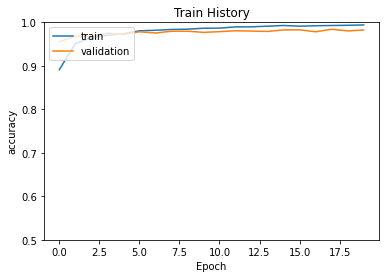

In [56]:
show_train_history ( train_history ,'accuracy', 'val_accuracy') #accuracy plot

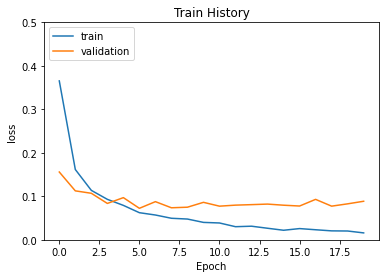

In [57]:
show_train_history ( train_history ,'loss', 'val_loss') #loss plot

In [58]:
print(test_acc)

0.977400004863739


*Predict*

* Visualize Confusion Matrix

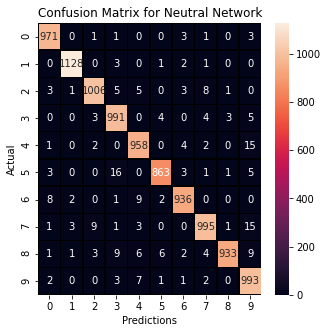

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns


predict=np.argmax(model.predict(test_images), axis=-1)
predict_classes=predict.reshape(len(test_images))

confusion = confusion_matrix(test_labels, predict_classes)
#print(confusion)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion,annot = True, linewidths=0.5,linecolor="black",fmt=".0f",ax=ax)
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Neutral Network")
plt.show()

#print(len(predict_classes))

*Plot 5 random images from test set with their predictions*
(just for a trial)

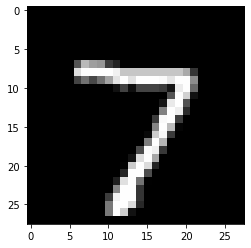

Model prediction: 7


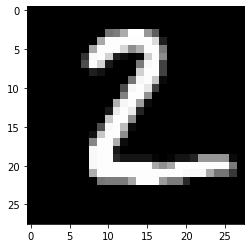

Model prediction: 2


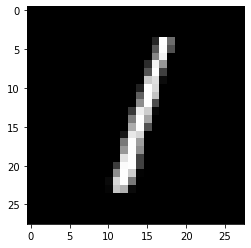

Model prediction: 1


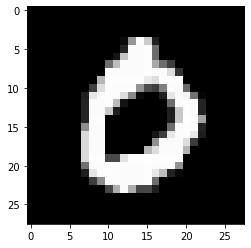

Model prediction: 0


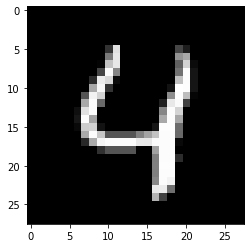

Model prediction: 4


In [60]:
n_images = 5
test_images = test_images[:n_images]
predictions = model(test_images)

# Display image and model prediction.
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))